In [2]:
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Add region column in life expectancy dataset through api

In [3]:
df = pd.read_csv('../Dataset/Life Expectancy Data.csv')

In [4]:
req = requests.get("https://restcountries.com/v3.1/all?fields=name,region")

content = json.loads(req.content.decode())

In [5]:
countries = [{"name": country["name"]["common"], "region": country["region"]} for country in content]

In [6]:
df2 = pd.DataFrame(countries)
df2

,name,region
0,Turks and Caicos Islands,Americas
1,Nigeria,Africa
2,Western Sahara,Africa
3,Taiwan,Asia
4,Costa Rica,Americas
...,...,...
245,American Samoa,Oceania
246,Micronesia,Oceania
247,Sri Lanka,Asia
248,South Africa,Africa


In [7]:
df2.head()

,name,region
0,Turks and Caicos Islands,Americas
1,Nigeria,Africa
2,Western Sahara,Africa
3,Taiwan,Asia
4,Costa Rica,Americas


In [8]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [9]:
cdf = df2[df2["name"].isin(df.Country.unique())]
cdf

,name,region
1,Nigeria,Africa
4,Costa Rica,Americas
5,Benin,Africa
6,Honduras,Americas
7,Palau,Oceania
...,...,...
242,Uruguay,Americas
243,Colombia,Americas
247,Sri Lanka,Asia
248,South Africa,Africa


In [10]:
AllCountries = pd.Series(df.Country.unique())
AllCountries

0                             Afghanistan
1                                 Albania
2                                 Algeria
3                                  Angola
4                     Antigua and Barbuda
                      ...                
188    Venezuela (Bolivarian Republic of)
189                              Viet Nam
190                                 Yemen
191                                Zambia
192                              Zimbabwe
Length: 193, dtype: object

In [11]:
SelectedCountries =  AllCountries[AllCountries.isin(cdf.name)]
SelectedCountries

0              Afghanistan
1                  Albania
2                  Algeria
3                   Angola
4      Antigua and Barbuda
              ...         
186             Uzbekistan
187                Vanuatu
190                  Yemen
191                 Zambia
192               Zimbabwe
Length: 171, dtype: object

In [12]:
new_df =  df[df.Country.isin(SelectedCountries)]
new_df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [13]:
new_df["Region"] = new_df.Country.apply(lambda x:cdf.set_index("name").loc[x].item())

C:\Users\Abhishek\AppData\Local\Temp\ipykernel_1324\4212224270.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["Region"] = new_df.Country.apply(lambda x:cdf.set_index("name").loc[x].item())


In [14]:
new_df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Region
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,Asia
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,Asia
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,Asia
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,Asia
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,Asia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2,Africa
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5,Africa
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0,Africa
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8,Africa


In [15]:
new_df.shape

(2586, 23)

In [16]:
new_df["Region"].unique()

array(['Asia', 'Europe', 'Africa', 'Americas', 'Oceania'], dtype=object)

In [17]:
region_group = new_df.groupby("Region")

In [18]:
def null_bar(ax, df, name):
    total_values = len(df)
    null_values = df.isnull().sum()

    percentage_null = (null_values / total_values) * 100
    
    # Calculate the percentage of non-null values
    percentage_non_null = ((total_values - null_values)/ total_values) * 100
    
    # Create a stacked bar chart
 
    ax.barh(df.columns, percentage_non_null, height=0.3, label='Non-null Values', color='green')
    ax.barh(df.columns, percentage_null,  height=0.3,  left=percentage_non_null, label='Null Values', color='red')
    
    ax.set_xlabel('Columns')
    ax.set_ylabel('Percentage')
    # ax.set_xticks(rotation=90)
    ax.set_title(f'Percentage Stacked Bar Chart with Null Values for {name}' )

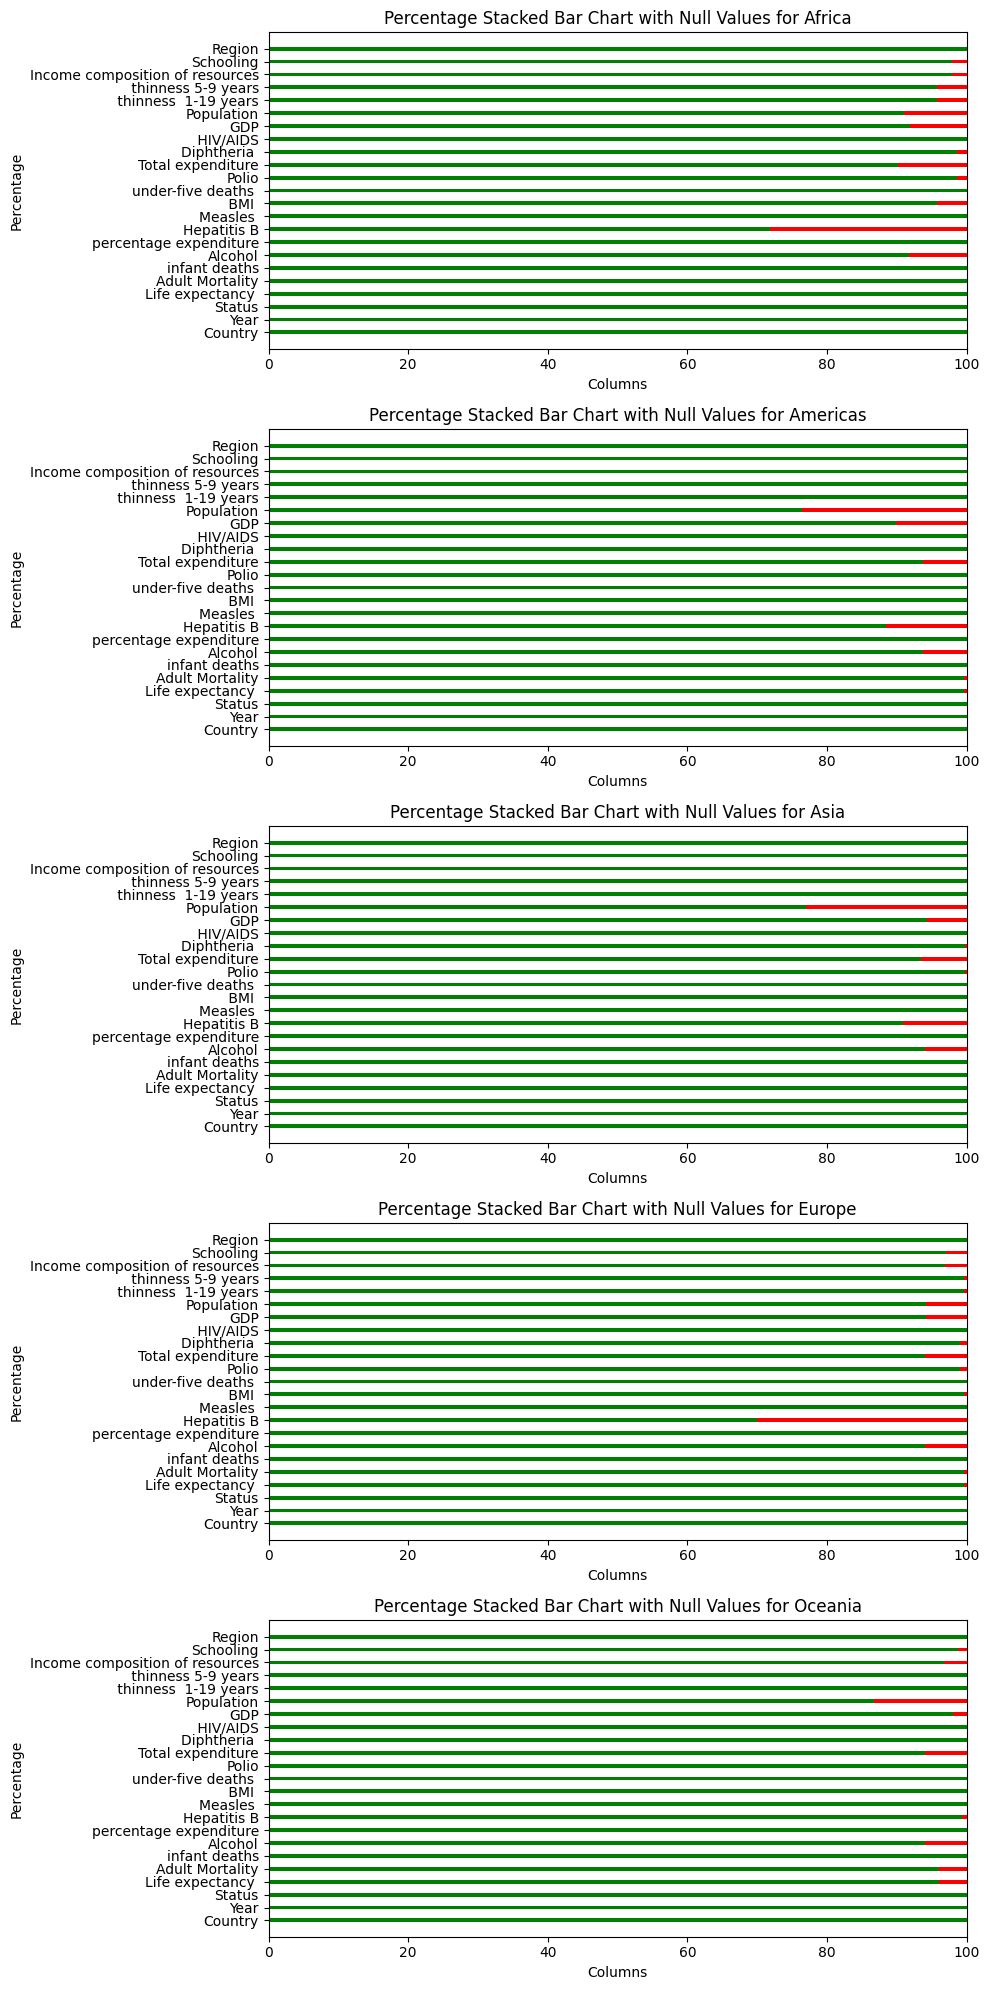

In [19]:
fig, axes = plt.subplots(nrows=5,figsize=(10, 20), tight_layout = True)

for i, ( name, dataframe ) in enumerate(region_group):
    null_bar(axes[i], dataframe, name)    

plt.show()

In [20]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [21]:
country_group = df.groupby("Country")

In [75]:
country_p_null_value = country_group.apply(lambda group:group["Population"].isna().sum()> 15) 

In [54]:
country_p_null_value.shape

(193,)

In [57]:
pd.Series(df.Country.unique()).loc[]

0                             Afghanistan
1                                 Albania
2                                 Algeria
3                                  Angola
4                     Antigua and Barbuda
                      ...                
188    Venezuela (Bolivarian Republic of)
189                              Viet Nam
190                                 Yemen
191                                Zambia
192                              Zimbabwe
Length: 193, dtype: object

Object `pd.filter` not found.


In [69]:
country_p_null_value[country_p_null_value == True].index

Index(['Antigua and Barbuda', 'Bahamas', 'Bahrain', 'Barbados',
       'Bolivia (Plurinational State of)', 'Brunei Darussalam', 'Congo',
       'Cuba', 'Czechia', 'Côte d'Ivoire',
       'Democratic People's Republic of Korea',
       'Democratic Republic of the Congo', 'Egypt', 'Gambia', 'Grenada',
       'Iran (Islamic Republic of)', 'Kuwait', 'Kyrgyzstan',
       'Lao People's Democratic Republic', 'Libya',
       'Micronesia (Federated States of)', 'New Zealand', 'Oman', 'Qatar',
       'Republic of Korea', 'Republic of Moldova', 'Saint Lucia',
       'Saint Vincent and the Grenadines', 'Saudi Arabia', 'Singapore',
       'Slovakia', 'Somalia', 'The former Yugoslav republic of Macedonia',
       'United Arab Emirates',
       'United Kingdom of Great Britain and Northern Ireland',
       'United Republic of Tanzania', 'United States of America',
       'Venezuela (Bolivarian Republic of)', 'Viet Nam', 'Yemen'],
      dtype='object', name='Country')

In [72]:
df[df.Country.isin(country_p_null_value[country_p_null_value == True].index)].isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                             37
percentage expenditure               0
Hepatitis B                         71
Measles                              0
 BMI                                 0
under-five deaths                    0
Polio                                0
Total expenditure                   70
Diphtheria                           0
 HIV/AIDS                            0
GDP                                417
Population                         640
 thinness  1-19 years                0
 thinness 5-9 years                  0
Income composition of resources    160
Schooling                          160
dtype: int64

In [73]:
df.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [74]:
(df[df.Country.isin(country_p_null_value[country_p_null_value == True].index)].isna().sum() / df.isna().sum()) *100

Country                                  NaN
Year                                     NaN
Status                                   NaN
Life expectancy                     0.000000
Adult Mortality                     0.000000
infant deaths                            NaN
Alcohol                            19.072165
percentage expenditure                   NaN
Hepatitis B                        12.839060
Measles                                  NaN
 BMI                                0.000000
under-five deaths                        NaN
Polio                               0.000000
Total expenditure                  30.973451
Diphtheria                          0.000000
 HIV/AIDS                                NaN
GDP                                93.080357
Population                         98.159509
 thinness  1-19 years               0.000000
 thinness 5-9 years                 0.000000
Income composition of resources    95.808383
Schooling                          98.159509
dtype: flo